<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting "Greenness" Of Content

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---


This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# set max printout options for pandas:
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

### 1. Load the data
- Note it is a `.tsv` file and has a tab separator instead of comma.
- Clean the `is_news` column.
- Make two new columns, `title` and `body`, from the `boilerplate` column.

> **Note:** The `boilerplate` column is in json dictionary format. You can use the `json.loads()` function from the `json` module to convert this into a python dictionary.

In [8]:
evergreen_tsv = '../data/evergreen_sites.tsv'

In [9]:
data = pd.read_csv(evergreen_tsv, sep='\t', na_values={'is_news' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

### 2. What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events).
- Stored as a binary indicator in the `label` column.
- Look at some examples.

In [15]:
# A:

#mask = data.label > 0
#data[mask]


### 3. Does being a news site affect green-ness?

**3.A Investigate with plots/EDA.**

In [21]:
# A:

data.groupby('is_news')['label'].mean()

is_news
0.0    0.507562
1.0    0.516916
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='is_news'>

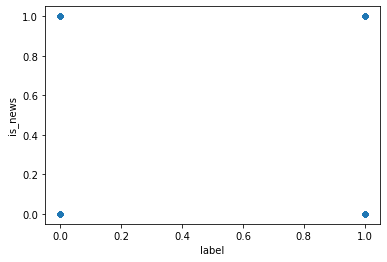

In [32]:
#drinks.plot(kind='scatter', x='beer', y='wine');


**3.B Test the hypothesis with cross validation and logistic regression**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [7]:
# A:

**3.C Interpret the results of cross validation.**

In [8]:
# A:

### 4. Does the website category affect green-ness?

**4.A Investigate with plots/EDA.**

In [9]:
# A:

**4.B Test the hypothesis with cross validation and logistic regression**

In [18]:
# A:

**4.C Fit a logistic regression and intepret the results of your model**

In [11]:
# A:

### 5. Does the image ratio affect green-ness?

**5.A Investigate with plots/EDA.**

> **Note**: It is worth thinking about how to best represent this variable. Split the image ratio into 10 bins using https://pandas.pydata.org/docs/reference/api/pandas.qcut.html and plot the result

In [12]:
# A:

**5.B Test the hypothesis with cross validation and logistic regression**

In [13]:
# A:

### 6. Fit a logistic regression with multiple predictors.
- The choice of predictors is up to you. Test features you think may be valuable to predict evergreen status.
- Do any EDA you may need.
- Interpret the coefficients of the model.

> **Tip:** [This pdf is very useful for an overview of interpreting logistic regression coefficients.](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf)

In [15]:
# A:

**Classification Reports/Matrix**

Classification reports are another means of evauliation classification models and return a few metrics that are based on True Positives, False Positives and False Negatives. 

In [16]:
from sklearn.metrics import confusion_matrix

# use the predict function to create an array of predictions for your predictors and assign it to y_pred

# create a confusion matrix


**Precision**  
- Of the observations your model predicted were positive, how many of those predictions are True Positives.


$$\frac{True Positives}{True Positives + False Positives}$$

** use the confusion matrix to calculate precision**

**Recall**  
- Of the observations that are positive, how many of did your model predict


$$\frac{True Positives}{True Positives + False Negatives}$$
** use the confusion matrix to calculate recall**

**F1-Score**

F1 exists on a range of 0 - 1 where 0 is just aweful and 1 is perfection.
F1 is considered a harmonic mean as it averages Precision and Recall.  With classification models you often times have to choose what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.  If you are uncertain which you should optimize, F1 score may be the metric of choice.

$$2*\frac{precision * recall}{precision + recall}$$

**Support**
Number of true observations in given class.  The count of possible true observations.  

In [17]:
from sklearn.metrics import precision_recall_fscore_support
# use precision_recall_fscore_support to obtain your f1 score and support for your multiple predictor model


In [ ]:
from sklearn.metrics import classification_report
# print the classification report and look at the metrics for positives